In [1]:
from ARIMA import *

C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
input_dir = "../Database"
file = "AirPassengers.csv"
df = pd.read_csv(os.path.join(input_dir, file), header=None, index_col=[0])
df.index = pd.to_datetime(df.index)
# dataframe.index= time, dataframe.columns=ground truth
ARMA = ARIMA(df)

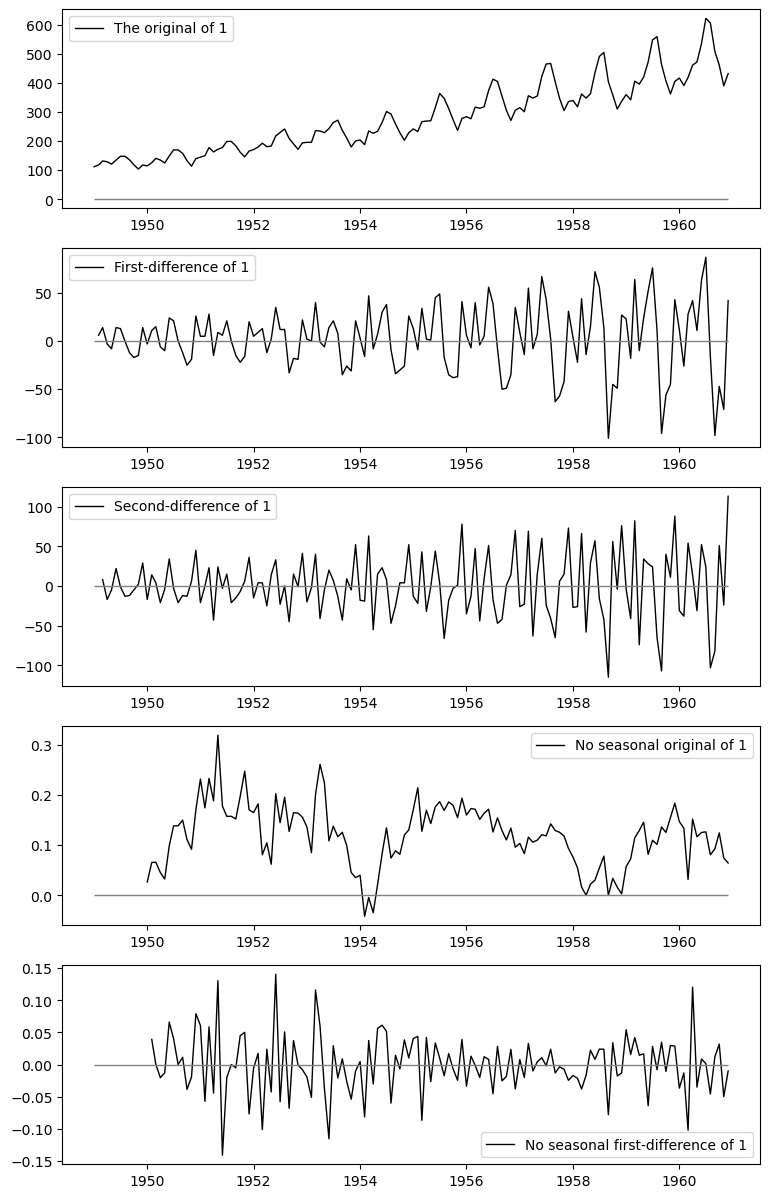

C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Ma

                                (1, 0, 0)           ((1, 12), 0, (1, 9, 12))                          (3, 0, 0)
SSE                                  0.22                               0.19                               0.22
AIC                               -195.03                            -208.72                            -189.02
SBC                               -189.28                            -191.46                            -177.52
Q(4)     {'q_stats': 6.82, 'p_val': 0.15}   {'q_stats': 5.27, 'p_val': 0.26}   {'q_stats': 1.99, 'p_val': 0.74}
Q(8)     {'q_stats': 8.07, 'p_val': 0.43}   {'q_stats': 8.72, 'p_val': 0.37}   {'q_stats': 3.33, 'p_val': 0.91}
Q(12)    {'q_stats': 33.33, 'p_val': 0.0}   {'q_stats': 9.81, 'p_val': 0.63}  {'q_stats': 23.64, 'p_val': 0.02}
ar.L1   {'coef': -0.38, 't_stats': -5.71}  {'coef': -0.25, 't_stats': -1.78}  {'coef': -0.36, 't_stats': -4.54}
ar.L12                                NaN  {'coef': -0.17, 't_stats': -1.15}                            

C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asas4\Documents\GitHub\Time_Series_Analysis\Codes\ARIMA.py:242: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_val = full_seasonal_diff[idx] + np.log(real_scale_forecasts.iloc[idx - 1]) + np.log(


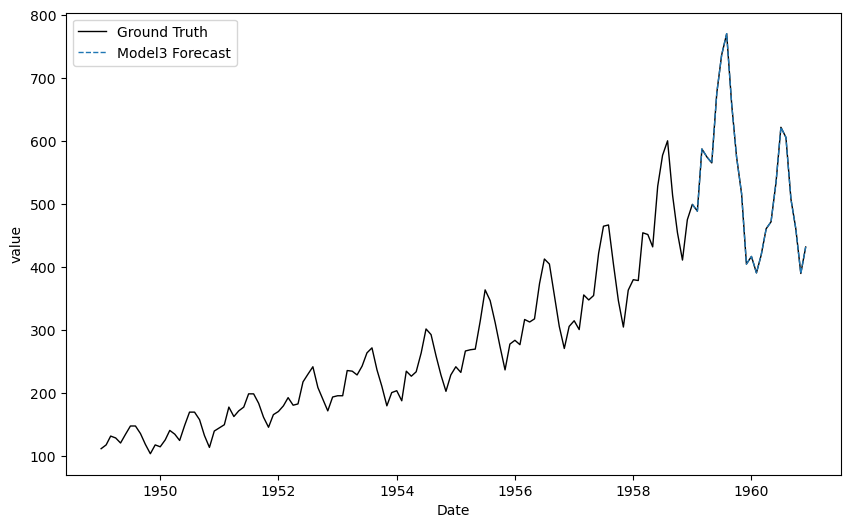

C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:

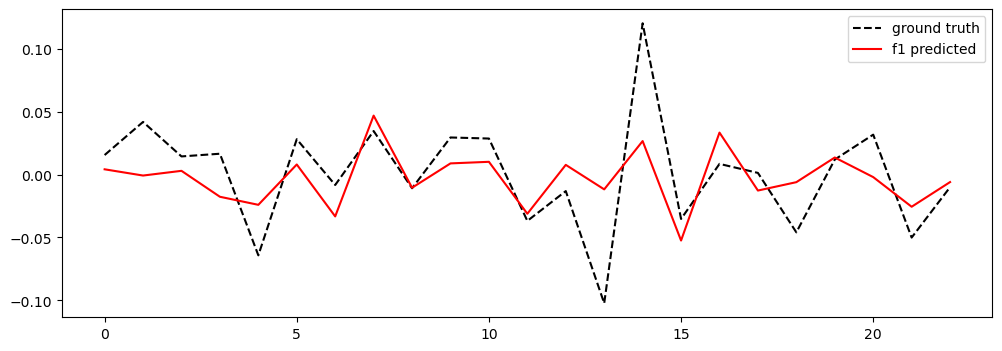

C:\Users\asas4\anaconda3\envs\python_311\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


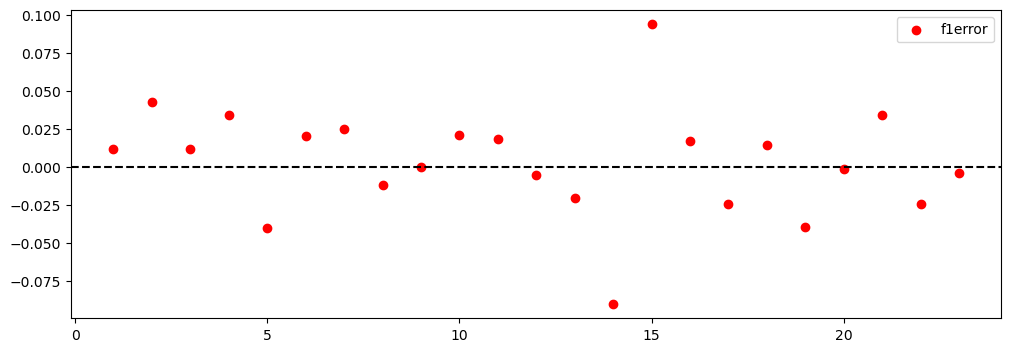

Actual value:1    0.016
Name: 1959-02-01 00:00:00, dtype: float64, f1 forecast:0.004
avg f1:-0.0031
var of f1:0.0005
mean squared prediction error of f1: 0.0013


C:\Users\asas4\Documents\GitHub\Time_Series_Analysis\Codes\ARIMA.py:310: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f'mean squared prediction error of f1: {round((f1_error ** 2).mean(), 4)}')


In [3]:
# seasonality
ARMA.plot_time_series(seasonality=12)
test_time_series = np.log(ARMA.data / ARMA.data.shift(12)).diff().dropna()
# test_time_series = ARMA.data

stationary = False
if stationary:
    ARMA.adf_test(seasonality=12)
    ARMA.kpss_test(seasonality=12)
    ARMA.ACF_and_PACF_test(test_time_series, 'passengers')

evaluate = True
if evaluate:
    lag_list = [(1, 0, 0), ([1, 12], 0, [1, 9, 12]), (3, 0, 0)]
    ARMA.evaluate_ARIMA(test_time_series, lag_list)

forecasting = True
if forecasting:
    # ARMA.plot_forecasting(test_time_series.iloc[:-12,0], (12, 0, 0), '1949-01-01', '1959-01-01')
    ARMA.plot_forecasting_log(test_time_series.iloc[:-12, 0], ([1, 12], 0, [1, 9, 12]), '1949-01-01', '1959-01-01')
    ARMA.estimate_forecasting_error(test_time_series, ([1, 12], 0, [1, 9, 12]), '1959-01-01')